**Task no 3 :  Bank Customer Churn Prediction**

In [17]:
# 📁 Step 1: Mount Google Drive
# ---------------------------------------------
# In Google Colab, we need to mount Google Drive to access files stored there.
# This allows you to read datasets (like CSVs) directly from your Drive.
# After running this, Colab will ask for permission — just follow the link and paste the auth code.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 📁 Step 1: Upload Dataset Manually (Google Colab)
# -------------------------------------------------------
# This method allows you to upload files directly from your local machine into Colab.
# Once you run `files.upload()`, a file selector will appear below the cell — select your CSV file.
# After upload, the file will be temporarily stored in the Colab session.
from google.colab import files
uploaded = files.upload()
 #📊 Step 2: Read the Uploaded CSV into a DataFrame
# -------------------------------------------------------
# Replace the filename below with the name of your uploaded file if it's different.
# We're using pandas to load the dataset for analysis and modeling.

import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
# 👀 Step 3: Preview the First Few Rows of the Dataset
df.head()


Saving Churn_Modelling.csv to Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
# 🧾 Step 4: Basic Dataset Overview
# --------------------------------------------------------

# 📌 Get a concise summary of the DataFrame
# This shows column names, data types, non-null counts, and memory usage
df.info()

# 📌 Check for missing/null values in each column
# This helps identify if any cleaning or imputation is needed
df.isnull().sum()

# 📌 Print the shape of the dataset
# Shows total number of rows and columns (i.e., observations and features)
print("Shape of dataset:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
Shape of dataset: (10002, 14)


In [6]:
# 🧹 Step 5: Drop Irrelevant Columns
# --------------------------------------------------------
# These columns do not contribute to model training:
# - 'RowNumber': Just an index, no predictive value
# - 'CustomerId': Unique identifier, not useful for learning patterns
# - 'Surname': Names don’t help predict churn and may introduce noise
# We remove them to simplify the dataset and avoid overfitting

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [7]:
# 🔤 Step 6: Encode Categorical Feature – Gender
# --------------------------------------------------------
# The 'Gender' column contains string values: 'Male' and 'Female'.
# Machine learning models require numerical input, so we use Label Encoding.
# LabelEncoder converts: Female → 0, Male → 1 (alphabetically by default)
# This transformation helps the model process gender as a binary variable.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0


In [8]:
# 🌍 Step 7: One-Hot Encode 'Geography' Column
# --------------------------------------------------------
# The 'Geography' column contains categorical values (e.g., 'France', 'Germany', 'Spain').
# Since machine learning models can't work with strings, we apply One-Hot Encoding.
# This converts the 'Geography' column into separate binary (0/1) columns — one for each country.
# `drop_first=True` avoids the dummy variable trap by removing one redundant column.

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [9]:
# 🎯 Step 8: Split Features and Target Variable
# --------------------------------------------------------
# 'Exited' is the target column — it indicates whether the customer left the bank (1) or not (0).
# We separate it from the rest of the dataset:
# - `X` will contain the input features used for prediction
# - `y` will contain the target labels the model should learn to predict

X = df.drop('Exited', axis=1)  # Features
y = df['Exited']              # Target


In [10]:
# 🧪 Step 9: Split the Data into Training and Testing Sets
# ---------------------------------------------------------------
# We split the dataset into:
# - 80% for training the model (`X_train`, `y_train`)
# - 20% for testing the model’s performance (`X_test`, `y_test`)
#
# Parameters explained:
# - `test_size=0.2` → 20% of the data goes to the test set
# - `random_state=42` → ensures reproducibility of the split
# - `stratify=y` → maintains the same class distribution in both train and test sets
#                  (important for imbalanced classification problems like churn)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# 🌲 Step 10: Train a Random Forest Classifier
# ---------------------------------------------------------------
# We are using a Random Forest — an ensemble learning method that builds multiple decision trees
# and combines their results to improve accuracy and prevent overfitting.
#
# - `random_state=42` ensures consistent results across runs
# - `.fit(X_train, y_train)` trains the model using the training data

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# 📊 Step 11: Evaluate the Model
# ----------------------------------------------------------------
# After training, we evaluate the model's performance using the test set.
#
# - `model.predict(X_test)` makes predictions on unseen test data
# - `confusion_matrix()` shows true positives, true negatives, false positives, and false negatives
# - `classification_report()` provides precision, recall, F1-score, and support for each class
#
# These metrics help us understand how well the model is predicting customer churn.

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1535   58]
 [ 209  199]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.49      0.60       408

    accuracy                           0.87      2001
   macro avg       0.83      0.73      0.76      2001
weighted avg       0.86      0.87      0.85      2001



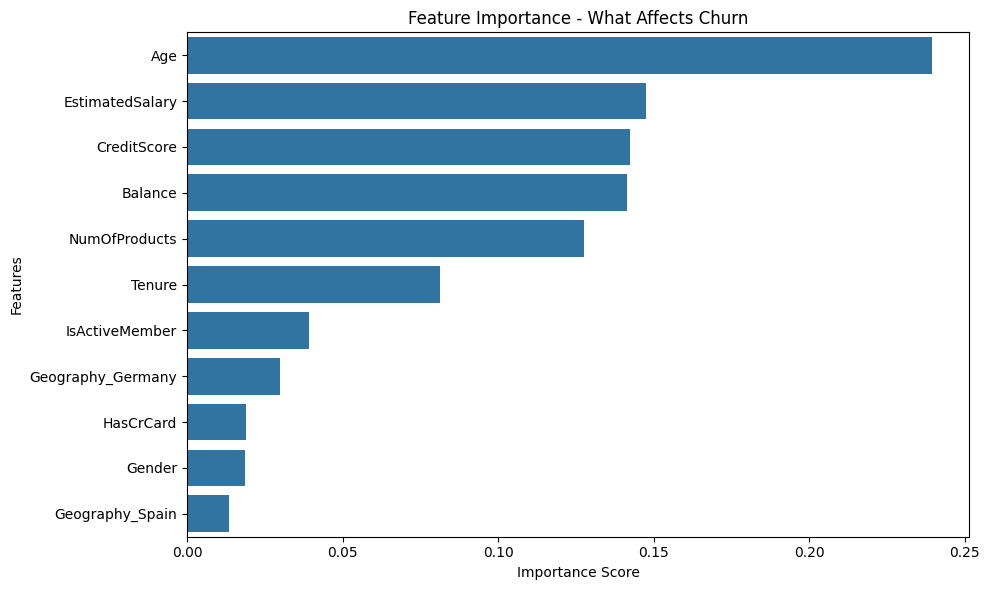

In [13]:
# 📈 Step 12: Visualize Feature Importance
# -------------------------------------------------------------------
# Random Forest models can rank features based on how important they are in predicting the target.
#
# - `model.feature_importances_` gives importance scores for each feature
# - We convert it into a pandas Series for easy plotting
# - A Seaborn barplot is used to show which features impact customer churn the most
#
# This helps with model explainability and understanding which customer attributes matter most.

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.sort_values(ascending=False),
            y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance - What Affects Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
